In [1]:
import numpy as np
from ex_5_12 import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [4]:
def modify_matrix(matrix, slices):
    matrix[slices] = 0

In [7]:
M = np.ones((2,2))
modify_matrix(M, (slice(None),1))
print(M)

[[1. 0.]
 [1. 0.]]


In [2]:
droga = Track(4, 4)
droga.set_start((np.ones(2) * 3).astype(int), np.arange(2))
droga.set_finish(np.arange(2), (np.ones(2) * 3).astype(int))
droga.set_boundries_rectangle([2,4], [2,4])
Q, t_policy, episodes = off_policy_MC_control(droga, n_iter = 10, behaviour_eps=0.01)

Iteration: 0, seconds elapsed: 0.0
Iteration: 1, seconds elapsed: 0.0
Iteration: 2, seconds elapsed: 0.0
Iteration: 3, seconds elapsed: 0.0
Iteration: 4, seconds elapsed: 0.0
Iteration: 5, seconds elapsed: 0.0
Iteration: 6, seconds elapsed: 0.01
Iteration: 7, seconds elapsed: 0.0
Iteration: 8, seconds elapsed: 0.0
Iteration: 9, seconds elapsed: 0.0


In [3]:
Q[-1,0:2,0,0]

array([[[-0.        , -0.        , -0.        ],
        [-0.        , -0.        , -4.77808464],
        [-0.        , -5.83037343, -3.12480674]],

       [[-0.        , -0.        , -0.        ],
        [-0.        , -0.        , -3.69401604],
        [-0.        , -3.        , -3.45653762]]])

In [24]:
track = Track(32, 17)
track.set_start((np.ones(17) * 31).astype(int), np.arange(17))
track.set_finish(np.arange(32), (np.ones(32) * 16).astype(int))
track.set_boundries_rectangle([7,32], [9,17])
track.set_boundries_rectangle([6,7], [10,17])

track.set_boundries_rectangle([0,4], [0,1])
track.set_boundries_rectangle([0,3], [1,2])
track.set_boundries_rectangle([0,1], [2,3])

track.set_boundries_rectangle([14,32], [0,1])
track.set_boundries_rectangle([22,32], [1,2])
track.set_boundries_rectangle([29,32], [2,3])

track.set_boundries_rectangle([10,12], [10,17])

print(track)

[['X' 'X' 'X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 ['X' 'X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 ['X' 'X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 ['X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '|']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 ['X' 

In [14]:
Q, t_policy, episodes = off_policy_MC_control(track, n_iter = 100000, behaviour_eps=0.08)

Iteration: 0, seconds elapsed: 1.86
Iteration: 1, seconds elapsed: 0.01
Iteration: 2, seconds elapsed: 0.02
Iteration: 3, seconds elapsed: 0.01
Iteration: 4, seconds elapsed: 0.02
Iteration: 5, seconds elapsed: 0.01
Iteration: 6, seconds elapsed: 0.01
Iteration: 7, seconds elapsed: 0.02
Iteration: 8, seconds elapsed: 0.02
Iteration: 9, seconds elapsed: 0.01
Iteration: 10, seconds elapsed: 0.01
Iteration: 11, seconds elapsed: 0.01
Iteration: 12, seconds elapsed: 0.01
Iteration: 13, seconds elapsed: 0.02
Iteration: 14, seconds elapsed: 0.01
Iteration: 15, seconds elapsed: 0.02
Iteration: 16, seconds elapsed: 0.01
Iteration: 17, seconds elapsed: 0.02
Iteration: 18, seconds elapsed: 0.02
Iteration: 19, seconds elapsed: 0.02
Iteration: 20, seconds elapsed: 0.02
Iteration: 21, seconds elapsed: 0.01
Iteration: 22, seconds elapsed: 0.02
Iteration: 23, seconds elapsed: 0.01
Iteration: 24, seconds elapsed: 0.01
Iteration: 25, seconds elapsed: 0.01
Iteration: 26, seconds elapsed: 0.01
Iteration: 

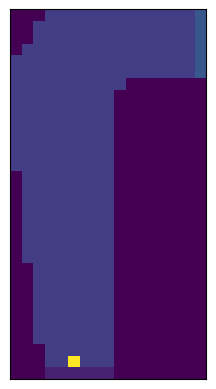

In [15]:
race = Race(track)
matrices = []
iter_counter = 0
while not race.is_finish:
    action = np.argwhere(t_policy[race.car.vertical_position, race.car.horizontal_position, race.car.vertical_speed, race.car.horizontal_speed] == 1)[0]
    race.take_action(action[0]-1, action[1]-1)
    grid = track.grid.copy()
    grid[race.car.vertical_position, race.car.horizontal_position] = 10
    matrices.append(grid)
    
    if iter_counter > 100:
        print("100 steps")
        break

fig, ax = plt.subplots()

# Function to update the plot
def update(frame):
    ax.clear()
    # Adjust the colormap and value range to reflect different values
    cax = ax.imshow(frame, cmap='viridis', vmin=-1, vmax=10)
    ax.set_xticks([])
    ax.set_yticks([])
    return cax

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=matrices, interval=500)

# Convert the animation to HTML5 video and display it
HTML(ani.to_html5_video())

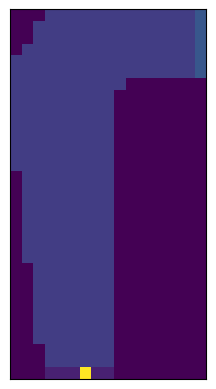

In [11]:


t = 9999
matrices = []
for i in range(len(episodes[t])):
    M = track.grid.copy()
    M[tuple(episodes[t][i][0:2])] = 10
    matrices.append(M)

fig, ax = plt.subplots()

# Function to update the plot
def update(frame):
    ax.clear()
    # Adjust the colormap and value range to reflect different values
    cax = ax.imshow(frame, cmap='viridis', vmin=np.min(track.grid), vmax=10)
    ax.set_xticks([])
    ax.set_yticks([])
    return cax

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=matrices, interval=500)

# Convert the animation to HTML5 video and display it
HTML(ani.to_html5_video())

NameError: name 'ax' is not defined

Error in callback <function _draw_all_if_interactive at 0x000002C830412CB0> (for post_execute), with arguments args (),kwargs {}:


NameError: name 'ax' is not defined

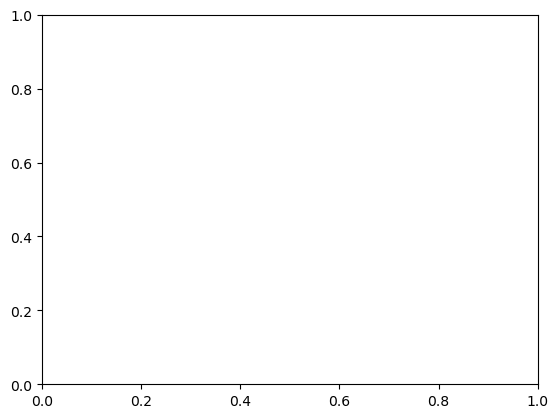

In [8]:
visualise_episodes(episodes, droga.grid)

In [3]:
print(t_policy[3,0:2,0,0])
print(Q[3, 0:2, 0, 0])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]]

 [[0. 0. 0.]
  [0. 0. 1.]
  [0. 0. 0.]]]
[[[-0.         -0.         -0.        ]
  [-0.         -0.         -4.76684806]
  [-0.         -4.         -2.11971772]]

 [[-0.         -0.         -0.        ]
  [-0.         -0.         -4.02339249]
  [-0.         -4.0920819  -4.92891681]]]


In [16]:
np.random.seed(123)
race = Race(droga)
print(race)
state = (race.car.vertical_position, race.car.horizontal_position, race.car.vertical_speed, race.car.horizontal_speed)
print(np.argwhere(t_policy[state]==1))
action = np.argwhere(t_policy[state]==1)[0]
race.take_action(action[0]-1, action[1]-1)
print(race)


[[' ' ' ' ' ' '|']
 [' ' ' ' ' ' '|']
 [' ' ' ' 'X' 'X']
 ['C' '-' 'X' 'X']]
[[2 2]]
[[' ' ' ' ' ' '|']
 [' ' ' ' ' ' '|']
 [' ' 'C' 'X' 'X']
 ['-' '-' 'X' 'X']]


c:\Users\czerw\miniconda3\envs\ReinforcementLearning\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


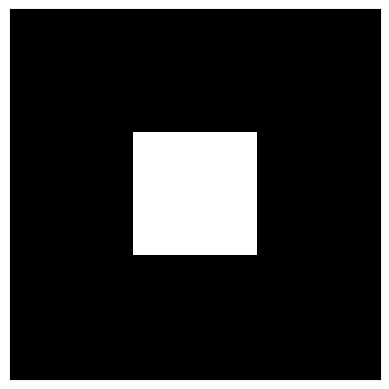

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Example sequence of matrices
matrices = [
    np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
    np.array([[0, 0, 0], [0, 0, 0], [0, 1, 0]]),
    np.array([[0, 0, 0], [0, 0, 0], [1, 0, 0]]),
    np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]]),
    np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]])
]

# Create a figure and axis
fig, ax = plt.subplots()

# Function to update the plot
def update(frame):
    ax.clear()
    ax.imshow(frame, cmap='gray', vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=matrices, interval=500)

# Convert the animation to HTML5 video and display it
HTML(ani.to_html5_video())


In [3]:
import numpy as np

# Example matrix
M = np.array([[0, 2, 0], [4, 0, 6], [0, 0, 3]])

# Mask the zero elements
masked_M = np.ma.masked_equal(M, 0)

# Find the index of the maximum element in the masked array
max_index = np.argmax(masked_M)

# Convert the flattened index to row and column indices
row, col = np.unravel_index(max_index, M.shape)

print(f"Maximum element (excluding zeros) is at row {row}, column {col}")

Maximum element (excluding zeros) is at row 1, column 2


In [4]:
masked_M

masked_array(
  data=[[--, 2, --],
        [4, --, 6],
        [--, --, 3]],
  mask=[[ True, False,  True],
        [False,  True, False],
        [ True,  True, False]],
  fill_value=0)